EMMANUEL NYAVOR
MACHINE LEARNING PROJECT
SPRING 2025

In [2]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC # Import the SVC class from sklearn.svm


In [59]:
# Load the dataset
url = 'https://raw.githubusercontent.com/enyavor90/groundwater-contamination-analysis/main/dumpsite_vsb.csv'  # Corrected URL
df = pd.read_csv(url)

In [60]:
# Display initial structure
print(df.head())
print(df.info())

  Sample  App. Distance     Fe     Pb     Cd   TDS      Zn    Cu     Cr   \
0  WF 01            21.0  0.283  0.002  0.009   288  0.001  0.002  0.001   
1  WF 02           250.0  0.001  0.002  0.002   279  0.006  0.003  0.001   
2  WF 03            42.0  0.004  0.001  0.003   268  0.001  0.001  0.001   
3  WF 04            85.0  0.002  0.002  0.002   156  0.001  0.002  0.006   
4  WF 05            50.0  0.223  0.002  0.002   169  0.001  0.001  0.001   

       Cl  
0  75.331  
1  53.175  
2  39.881  
3  26.588  
4  44.313  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample          15 non-null     object 
 1   App. Distance   14 non-null     float64
 2   Fe              15 non-null     float64
 3   Pb              15 non-null     float64
 4   Cd              15 non-null     float64
 5   TDS             15 non-null     int64  
 6   Zn 

In [5]:
# Check column names to make sure they're clean
print(df.columns)

Index(['Sample', 'App. Distance ', 'Fe ', 'Pb ', 'Cd ', 'TDS ', 'Zn', 'Cu ',
       'Cr ', 'Cl'],
      dtype='object')


In [6]:
# Clean column names
df.columns = df.columns.str.strip()

In [7]:
# Drop rows with missing Fe or Cd values to safely create contamination flags
df = df.dropna(subset=['Fe', 'Cd'])

In [8]:
# Define WHO thresholds
WHO_Fe_limit = 0.3    # mg/L
WHO_Cd_limit = 0.003  # mg/L

In [9]:
# Create binary contamination labels
df['Fe_contaminated'] = df['Fe'] > WHO_Fe_limit
df['Cd_contaminated'] = df['Cd'] > WHO_Cd_limit

In [10]:
# Visualize new dataframe
print(df[['Fe', 'Fe_contaminated', 'Cd', 'Cd_contaminated']])

       Fe  Fe_contaminated     Cd  Cd_contaminated
0   0.283            False  0.009             True
1   0.001            False  0.002            False
2   0.004            False  0.003            False
3   0.002            False  0.002            False
4   0.223            False  0.002            False
5   0.001            False  0.002            False
6   1.054             True  0.038             True
7   0.001            False  0.002            False
8   0.001            False  0.001            False
9   0.410             True  0.002            False
10  0.002            False  0.111             True
11  1.150             True  0.034             True
12  0.007            False  0.004             True
13  0.069            False  0.001            False
14  0.300            False  0.003            False


In [11]:
# Select feature for PCA
df = df.iloc[:-1]
features = ['App. Distance', 'Fe', 'Pb', 'Cd', 'TDS', 'Zn', 'Cu', 'Cr', 'Cl']
X = df[features]

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
print(X_scaled)

[[-9.93675718e-01  1.42454088e-01 -1.71498585e-01 -2.13937517e-01
   2.34275237e-01 -5.51677284e-01  3.99043442e-01 -3.85922492e-01
   1.82891752e+00]
 [ 1.79104837e+00 -6.03446096e-01 -1.71498585e-01 -4.54924604e-01
   1.64982561e-01  2.20670914e+00  1.51636508e+00 -3.85922492e-01
   6.34660068e-01]
 [-7.38308007e-01 -5.95510988e-01 -1.37198868e+00 -4.20497877e-01
   8.02915132e-02 -5.51677284e-01 -7.18278196e-01 -3.85922492e-01
  -8.19159646e-02]
 [-2.15412219e-01 -6.00801060e-01 -1.71498585e-01 -4.54924604e-01
  -7.82017341e-01 -5.51677284e-01  3.99043442e-01  3.47330243e+00
  -7.98438095e-01]
 [-6.41025070e-01 -1.62480790e-02 -1.71498585e-01 -4.54924604e-01
  -6.81927921e-01 -5.51677284e-01 -7.18278196e-01 -3.85922492e-01
   1.56978648e-01]
 [ 1.47487882e+00 -6.03446096e-01  2.22948161e+00 -4.54924604e-01
   1.04268979e+00 -5.51677284e-01 -7.18278196e-01 -3.85922492e-01
   1.35123610e+00]
 [-9.45034249e-01  2.18177693e+00 -1.71498585e-01  7.84437561e-01
  -1.33635875e+00  2.2067091

In [22]:
# Apply PCA
pca = PCA(n_components=7)
PCs = pca.fit_transform(X_scaled)

# Create column names for principal components
pc_cols = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]

# Add principal components as columns to the DataFrame
df[pc_cols] = PCs

# Now you can print the DataFrame with the new columns:
print(df[pc_cols])

         PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  -0.398245 -0.936965 -0.771952  0.588056  1.268068  0.657248 -1.019097
1   1.633359  2.083537 -0.421920 -0.457038  1.834375  0.143694  0.876317
2  -0.630613 -1.073569 -0.073632 -0.609615  0.405530 -1.299966 -0.384322
3  -0.409007 -0.228866  3.645517 -0.585106 -0.019749  0.742638 -0.037862
4  -0.647380 -0.872477 -0.040612  0.590108  0.066454 -0.595140  0.035329
5   2.687233 -1.172568 -0.720621  1.077912 -0.309987  1.018901  0.425856
6  -2.184841  4.115976 -0.180303  0.438409 -0.036180  0.389286 -0.419985
7   1.888212  1.366470 -0.145988 -1.128778 -0.364654 -1.087703 -0.121087
8   3.035909  0.807423 -0.105716  0.111072 -1.715898  0.096060 -0.578769
9  -0.680223 -0.898111 -0.267132  0.934384  0.267668 -0.351210  0.123060
10 -1.939679 -1.133679 -1.503350 -2.544631 -0.720586  0.894432  0.222777
11 -2.546097  0.180071 -0.350257  1.469327 -1.185900 -0.163244  0.584484
12 -0.111254 -0.788048  0.805984 -0.000466 -0.14896

In [23]:
# Explained variance ratio (propeigen)
explained_variance = pca.explained_variance_ratio_

# Print results
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f} ({variance * 100:.2f}% of variance)")

Principal Component 1: 0.3127 (31.27% of variance)
Principal Component 2: 0.2608 (26.08% of variance)
Principal Component 3: 0.1411 (14.11% of variance)
Principal Component 4: 0.1094 (10.94% of variance)
Principal Component 5: 0.0855 (8.55% of variance)
Principal Component 6: 0.0528 (5.28% of variance)
Principal Component 7: 0.0275 (2.75% of variance)


In [26]:
# Get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90%
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # +1 for index-to-count

print(f"Number of components to explain at least 90% of the variance: {n_components_90}")

Number of components to explain at least 90% of the variance: 5


In [24]:
# Create DataFrame of explained variance
explained_variance = pca.explained_variance_ratio_
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Explained Variance (%)': explained_variance * 100
})

# Save to CSV
variance_df.to_csv('pca_explained_variance.csv', index=False)

print("Saved PCA explained variance to 'pca_explained_variance.csv'")

Saved PCA explained variance to 'pca_explained_variance.csv'


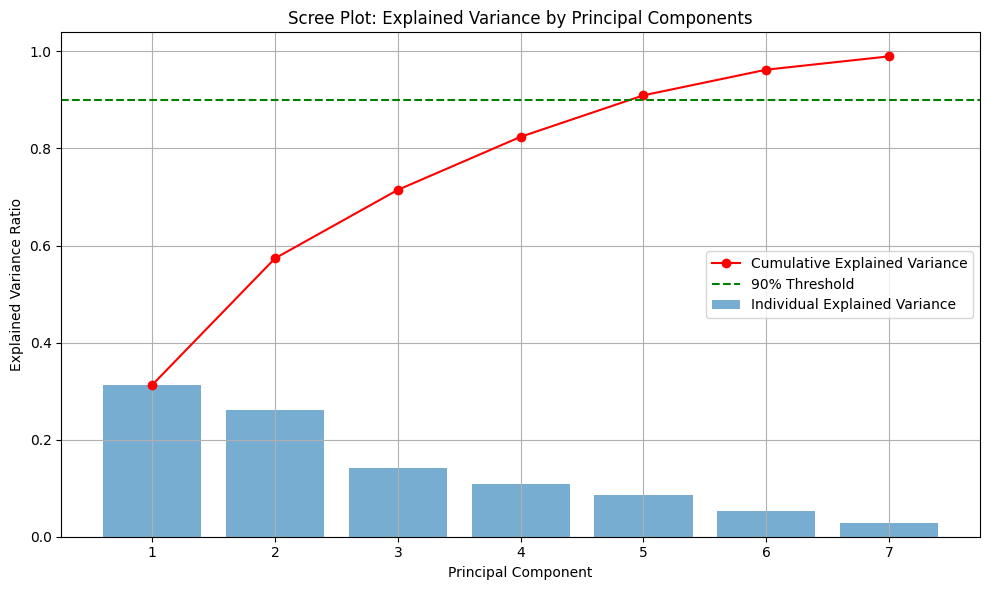

In [27]:
# Plot Scree Plot
plt.figure(figsize=(10, 6))

# Bar plot for individual explained variance
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual Explained Variance')

# Line plot for cumulative variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')

plt.axhline(y=0.90, color='green', linestyle='--', label='90% Threshold')

plt.title('Scree Plot: Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

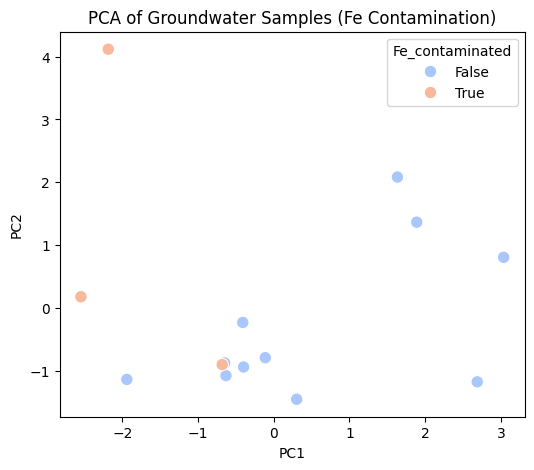

In [78]:
# === Plot PCA: Fe contamination ===
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Fe_contaminated', palette='coolwarm', s=80)
plt.title('PCA of Groundwater Samples (Fe Contamination)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


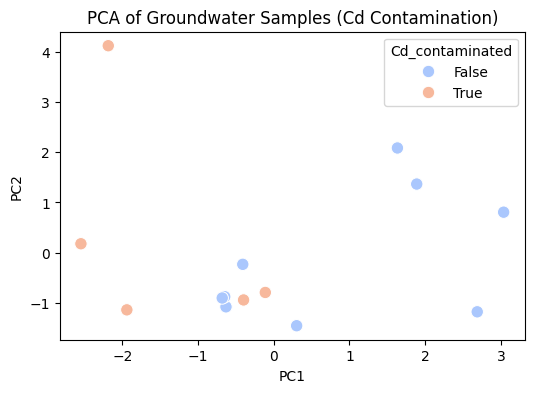

In [79]:
# Plot PCA: Cd contamination
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cd_contaminated', palette='coolwarm', s=80)
plt.title('PCA of Groundwater Samples (Cd Contamination)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
# PC1 loadings
pc1_loadings = pca.components_[0]  # First row corresponds to PC1
# Use features instead of df.columns to ensure matching lengths
pc1_df = pd.DataFrame({'Variable': features, 'PC1 Loading': pc1_loadings})
pc1_df['Absolute Loading'] = pc1_df['PC1 Loading'].abs()  # Get absolute values
pc1_df = pc1_df.sort_values(by='Absolute Loading', ascending=False)  # Sort by absolute value

print("Variables Most Strongly Aligned with PC1:\n", pc1_df[['Variable', 'PC1 Loading']])

Variables Most Strongly Aligned with PC1:
         Variable  PC1 Loading
0  App. Distance     0.542373
4            TDS     0.503326
2             Pb     0.427086
1             Fe    -0.385666
3             Cd    -0.330762
5             Zn     0.083218
8             Cl     0.056162
7             Cr    -0.036314
6             Cu     0.023512


In [37]:
# Initialize a dictionary to store loading DataFrames for each PC
loadings_dict = {}

# Compute the loadings for the first 5 PCs
for i in range(5):
    pc_loadings = pca.components_[i]  # Get the loadings for PC (0-indexed)

    # Create a DataFrame with the feature names and their loadings
    pc_df = pd.DataFrame({'Variable': features, f'PC{i+1} Loading': pc_loadings})
    pc_df['Absolute Loading'] = pc_df[f'PC{i+1} Loading'].abs()  # Get absolute values
    pc_df = pc_df.sort_values(by='Absolute Loading', ascending=False)  # Sort by absolute loading

    # Store the result in the dictionary
    loadings_dict[f'PC{i+1}'] = pc_df

    # Print most strongly aligned variables for each PC
    print(f"Variables Most Strongly Aligned with PC{i+1}:\n", pc_df[['Variable', f'PC{i+1} Loading']])
    print("\n")

Variables Most Strongly Aligned with PC1:
         Variable  PC1 Loading
0  App. Distance     0.542373
4            TDS     0.503326
2             Pb     0.427086
1             Fe    -0.385666
3             Cd    -0.330762
5             Zn     0.083218
8             Cl     0.056162
7             Cr    -0.036314
6             Cu     0.023512


Variables Most Strongly Aligned with PC2:
         Variable  PC2 Loading
5             Zn     0.602679
6             Cu     0.595720
8             Cl    -0.399359
1             Fe     0.290364
0  App. Distance     0.155543
7             Cr    -0.079415
4            TDS    -0.064534
2             Pb     0.053949
3             Cd     0.022835


Variables Most Strongly Aligned with PC3:
         Variable  PC3 Loading
7             Cr     0.832108
3             Cd    -0.359174
8             Cl    -0.297401
4            TDS    -0.231184
1             Fe    -0.135806
5             Zn    -0.110325
6             Cu     0.077761
2             Pb    -0.0051

<ipython-input-39-fc59123b980b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'PC{i+1} Loading', y='Variable', data=pc_df, palette='viridis')


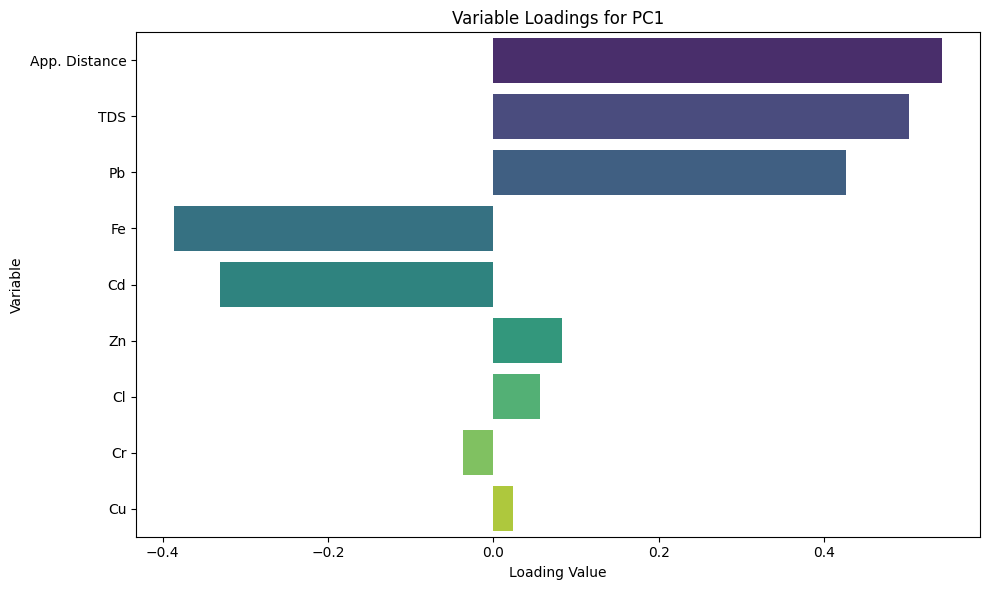

<ipython-input-39-fc59123b980b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'PC{i+1} Loading', y='Variable', data=pc_df, palette='viridis')


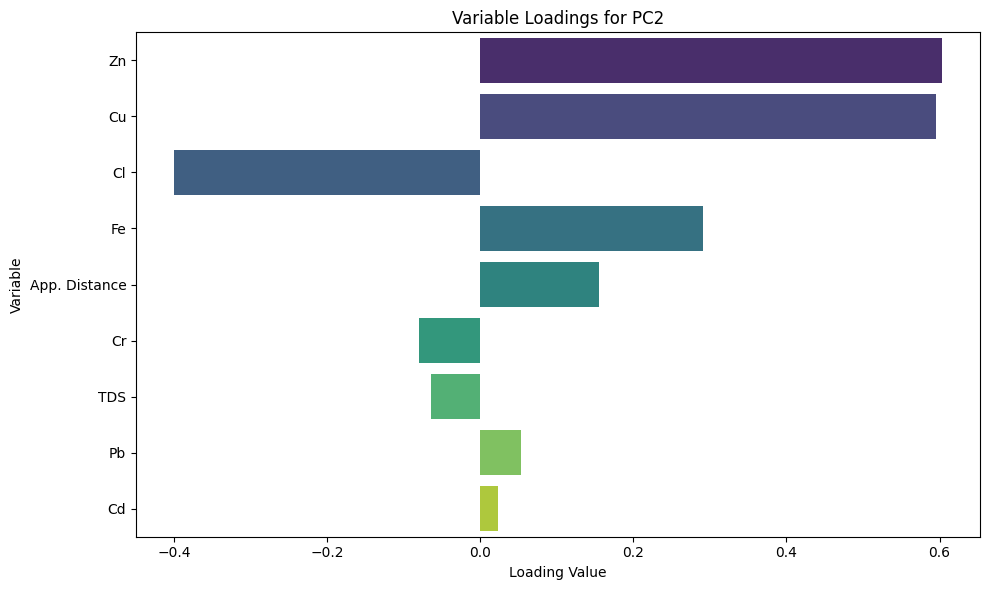

<ipython-input-39-fc59123b980b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'PC{i+1} Loading', y='Variable', data=pc_df, palette='viridis')


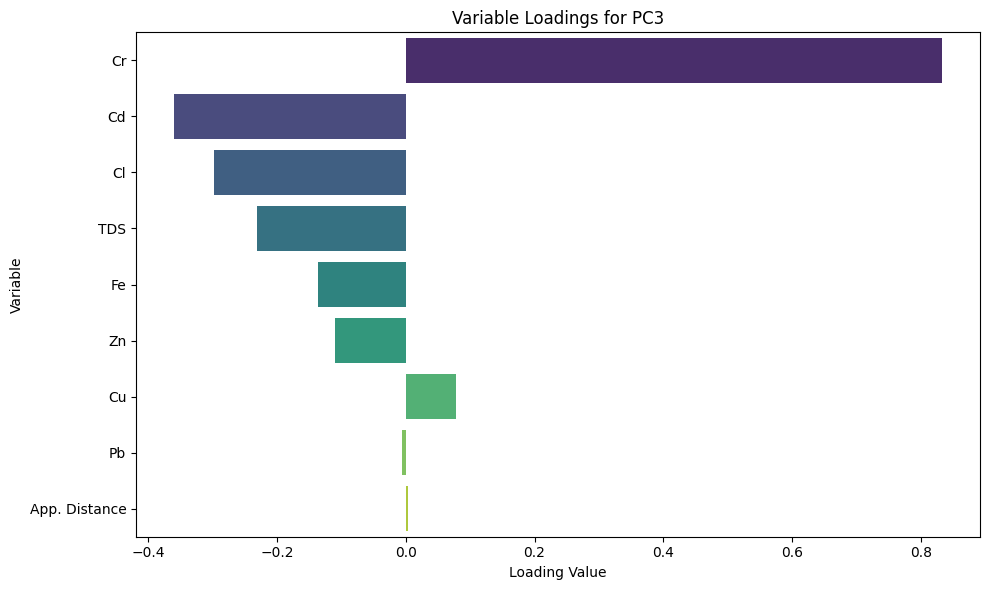

<ipython-input-39-fc59123b980b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'PC{i+1} Loading', y='Variable', data=pc_df, palette='viridis')


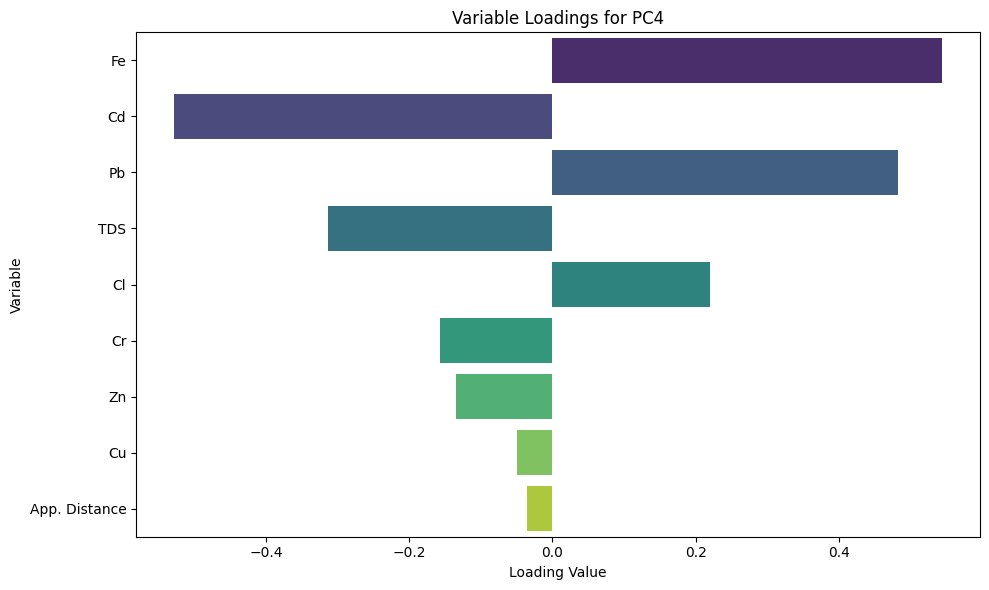

<ipython-input-39-fc59123b980b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'PC{i+1} Loading', y='Variable', data=pc_df, palette='viridis')


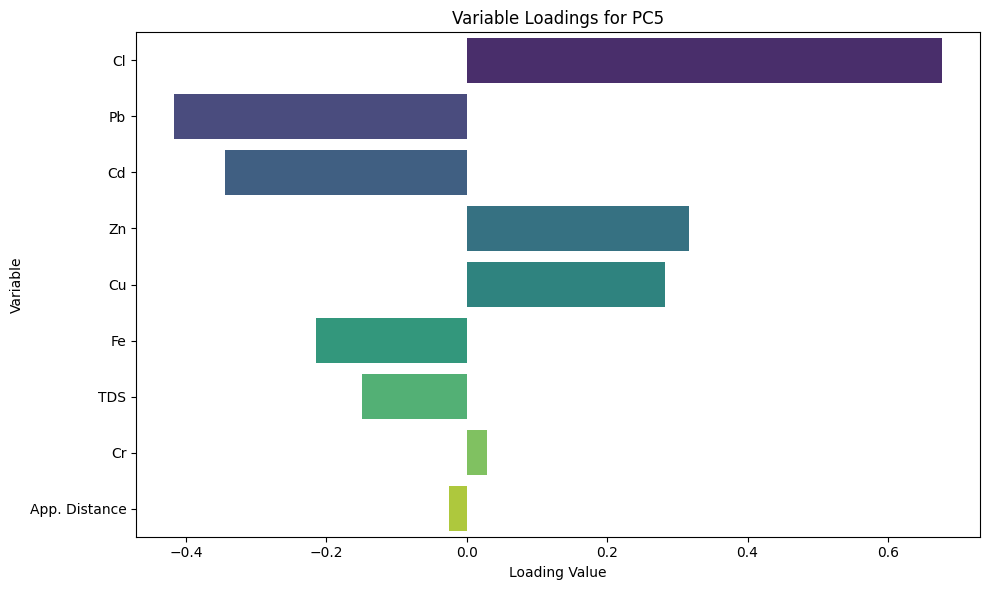

In [39]:
# Loop through first 5 PCs to plot variable loadings
for i in range(5):
    pc_loadings = pca.components_[i]  # Get the loadings for PC (0-indexed)

    # Create a DataFrame for the variable loadings for this PC
    pc_df = pd.DataFrame({'Variable': features, f'PC{i+1} Loading': pc_loadings})
    pc_df['Absolute Loading'] = pc_df[f'PC{i+1} Loading'].abs()  # Get absolute values
    pc_df = pc_df.sort_values(by='Absolute Loading', ascending=False)  # Sort by absolute loading

    # Plotting the variable loadings for each PC
    plt.figure(figsize=(10, 6))
    # Use f-string to dynamically select the correct column name for x
    sns.barplot(x=f'PC{i+1} Loading', y='Variable', data=pc_df, palette='viridis')
    plt.title(f'Variable Loadings for PC{i+1}')
    plt.xlabel('Loading Value')
    plt.ylabel('Variable')
    plt.tight_layout()
    plt.show()

In [30]:
# contamination labels
def contamination_label(row):
    if row['Fe_contaminated'] and row['Cd_contaminated']:
        return 'Both'
    elif row['Fe_contaminated']:
        return 'Fe only'
    elif row['Cd_contaminated']:
        return 'Cd only'
    else:
        return 'Clean'

df['Contamination'] = df.apply(contamination_label, axis=1)
print(df[['Contamination']])

   Contamination
0        Cd only
1          Clean
2          Clean
3          Clean
4          Clean
5          Clean
6           Both
7          Clean
8          Clean
9        Fe only
10       Cd only
11          Both
12       Cd only
13         Clean


In [31]:
# 'Contaminated' vs 'Clean'
df['Contamination'] = df.apply(
    lambda row: 'Contaminated' if row['Fe_contaminated'] or row['Cd_contaminated'] else 'Clean',
    axis=1
)
print(df[['Contamination']])

   Contamination
0   Contaminated
1          Clean
2          Clean
3          Clean
4          Clean
5          Clean
6   Contaminated
7          Clean
8          Clean
9   Contaminated
10  Contaminated
11  Contaminated
12  Contaminated
13         Clean


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca_biplot(df, pca, features, pc_x, pc_y, contamination_col='Contamination', sample_col='Sample'):
    plt.figure(figsize=(8, 6))

    # Custom green-red palette
    custom_palette = {'Clean': '#1a9641', 'Contaminated': '#d7191c'}

    # Scatterplot
    sns.scatterplot(
        x=pc_x,
        y=pc_y,
        data=df,
        hue=contamination_col,
        palette=custom_palette,
        s=100,
        edgecolor='black',
        linewidth=1.2
    )

    # Add sample names
    for i in range(len(df)):
        offset = 0.1 if df.loc[i, contamination_col] == 'Contaminated' else 0.05
        plt.text(df.loc[i, pc_x], df.loc[i, pc_y] - offset,
                 df.loc[i, sample_col], fontsize=9, ha='center', va='top', color='black')

    # Loadings
    loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)], index=features)

    for feature in loadings.index:
        x = loadings.loc[feature, pc_x] * 3
        y = loadings.loc[feature, pc_y] * 3
        plt.arrow(0, 0, x, y, color='blue', alpha=0.7, head_width=0.1)
        plt.text(x * 1.1, y * 1.1, feature, color='black', ha='center', va='center')

    # Axes styling
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.xlabel(pc_x)
    plt.ylabel(pc_y)
    plt.title(f'PCA Biplot: {pc_x} vs {pc_y}')
    plt.legend(title='Status')
    plt.tight_layout()
    plt.show()

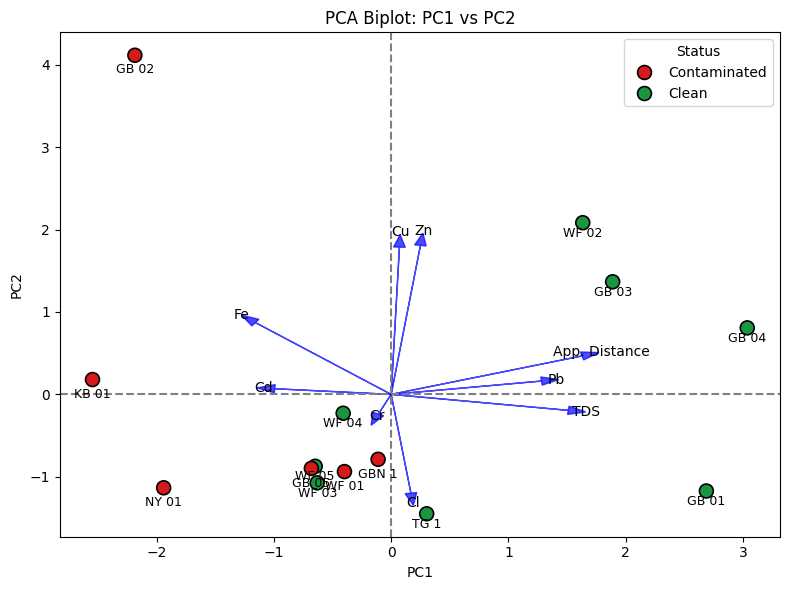

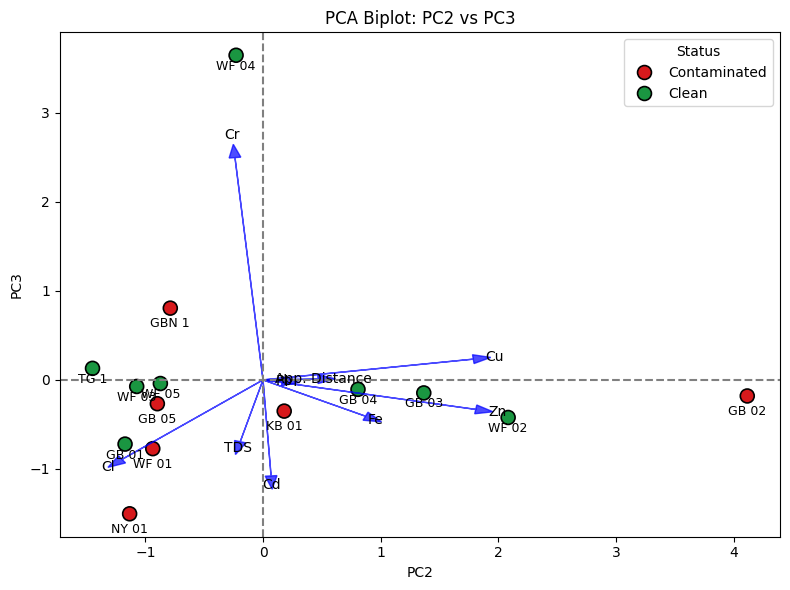

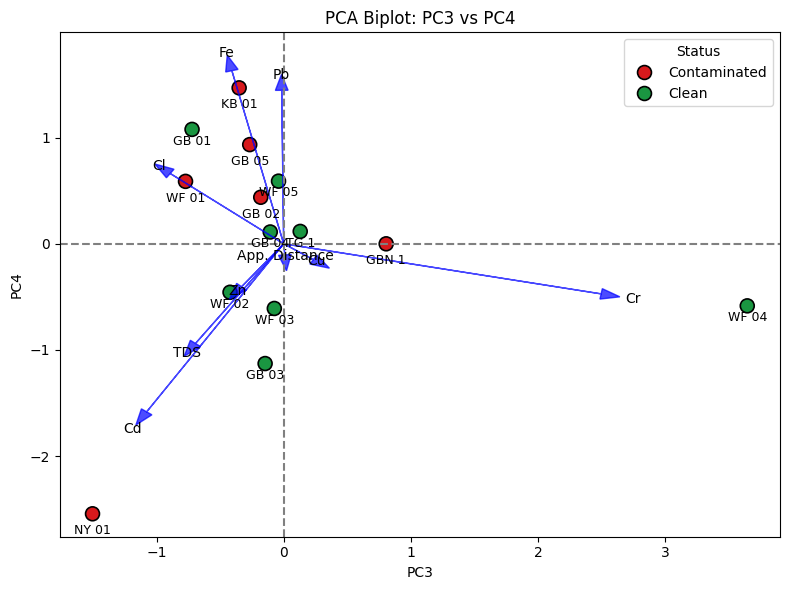

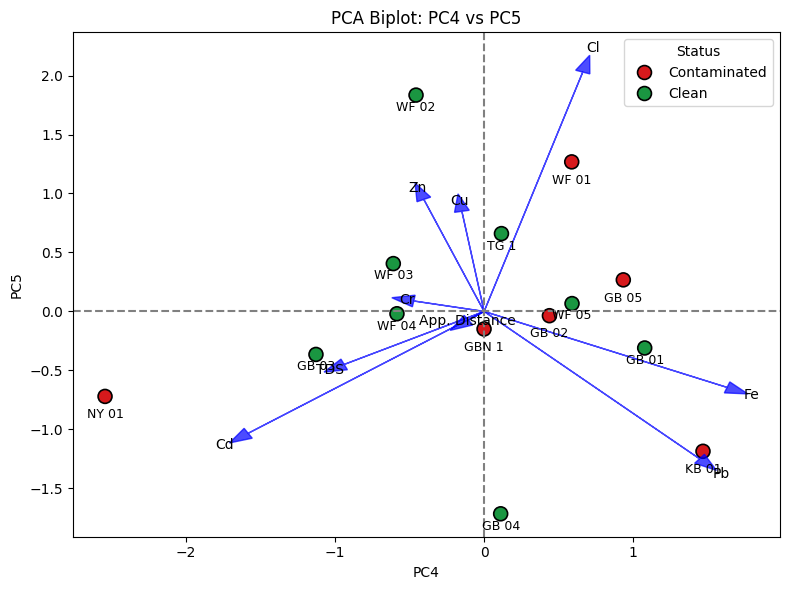

In [36]:
# Visualize PC1 vs PC2
plot_pca_biplot(df, pca, features, 'PC1', 'PC2')

# Visualize PC2 vs PC3
plot_pca_biplot(df, pca, features, 'PC2', 'PC3')

# Visualize PC3 vs PC4
plot_pca_biplot(df, pca, features, 'PC3', 'PC4')

# Visualize PC4 vs PC5 (if available)
plot_pca_biplot(df, pca, features, 'PC4', 'PC5')

Classification (RF vs SVM)

In [40]:
# Define features (X) and target variable (y)
features = ['App. Distance', 'Fe', 'Pb', 'Cd', 'TDS', 'Zn', 'Cu', 'Cr', 'Cl']
X = df[features]
# Target variable: binary (1 = contaminated, 0 = clean)
y = df['Contamination'].apply(lambda x: 1 if x == 'Contaminated' else 0)

In [41]:
# Split the data into a 80/20 train/test split using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
# Verify the Split datasets.
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (11, 9)
Testing data shape: (3, 9)
Training labels shape: (11,)
Testing labels shape: (3,)


In [43]:
# Create and train a RF model using the training data.
rf_model = RandomForestClassifier(n_estimators=100, random_state=10) # Create RF Model
rf_model.fit(X_train, y_train) # Train the Model: Fit the model using the training data

RandomForestClassifier(random_state=10)

In [44]:
# Make Predictions: Use the trained model to make predictions on the test set.
rf_predictions = rf_model.predict(X_test)

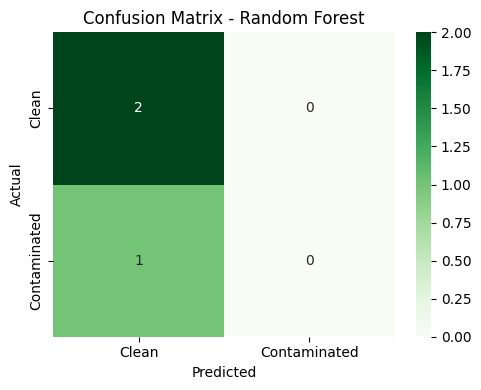

In [45]:
# Plot confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Clean', 'Contaminated'],
            yticklabels=['Clean', 'Contaminated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

         Feature  Importance
1             Fe    0.288547
0  App. Distance    0.258528
3             Cd    0.228695
4            TDS    0.129401
2             Pb    0.045927
8             Cl    0.025160
6             Cu    0.019466
7             Cr    0.002444
5             Zn    0.001833


<ipython-input-46-4e475c563993>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)


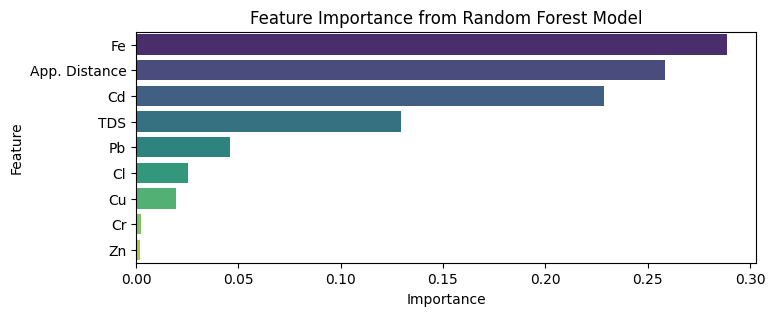

In [46]:
# 4 Computer the feature importance. Which variables are most important?
importances = rf_model.feature_importances_ # Get feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}) # Feature importance database
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Creating a bar plot to visualize the importance of each feature
colors = sns.color_palette("viridis", len(feature_importance_df))
plt.figure(figsize=(8, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
plt.title('Feature Importance from Random Forest Model')
plt.show()

In [47]:
# Model Accuracy
from sklearn import metrics # Import the metrics module
print()
print("RF model accuracy:", round(metrics.accuracy_score(y_test, rf_predictions), 2))


RF model accuracy: 0.67


In [48]:
# SVM Model
svm_model = SVC(kernel='linear', random_state=10) # Create SVM model
svm_model.fit(X_train, y_train) # Train the model

SVC(kernel='linear', random_state=10)

In [52]:
svm_predictions = svm_model.predict(X_test) # Use the trained model to make predictions on the test set

In [53]:
# SVM Model accuracy
print()
print("SVM model accuracy:", round(metrics.accuracy_score(y_test, svm_predictions), 2))


SVM model accuracy: 0.67


Both RF and SVM have similar accuracies may be equally good in predicting groundwatercontamination

Unsupervised Learning (K-Means Clustering)

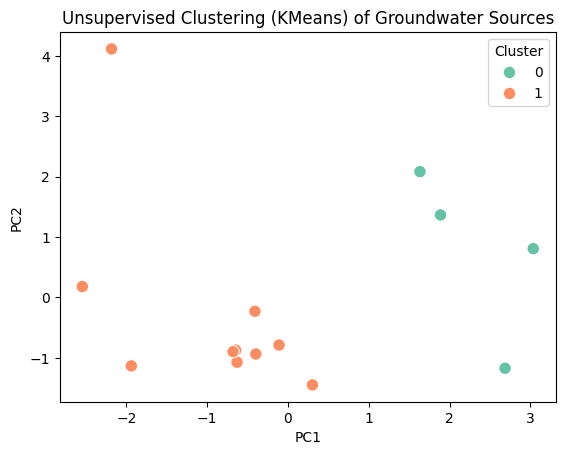

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
# Assuming 'X' contains the source features for clustering
X_scaled = scaler.fit_transform(X)  # Changed X_source to X

# Run KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=80)
plt.title("Unsupervised Clustering (KMeans) of Groundwater Sources")
plt.show()

In [55]:
# Add cluster column to original scaled DataFrame
clustered_df = pd.DataFrame(X_scaled, columns=X.columns)
clustered_df['Cluster'] = df['Cluster']

# Calculate mean feature values for each cluster
cluster_means = clustered_df.groupby('Cluster').mean()

# Transpose for easier plotting
cluster_means_T = cluster_means.T

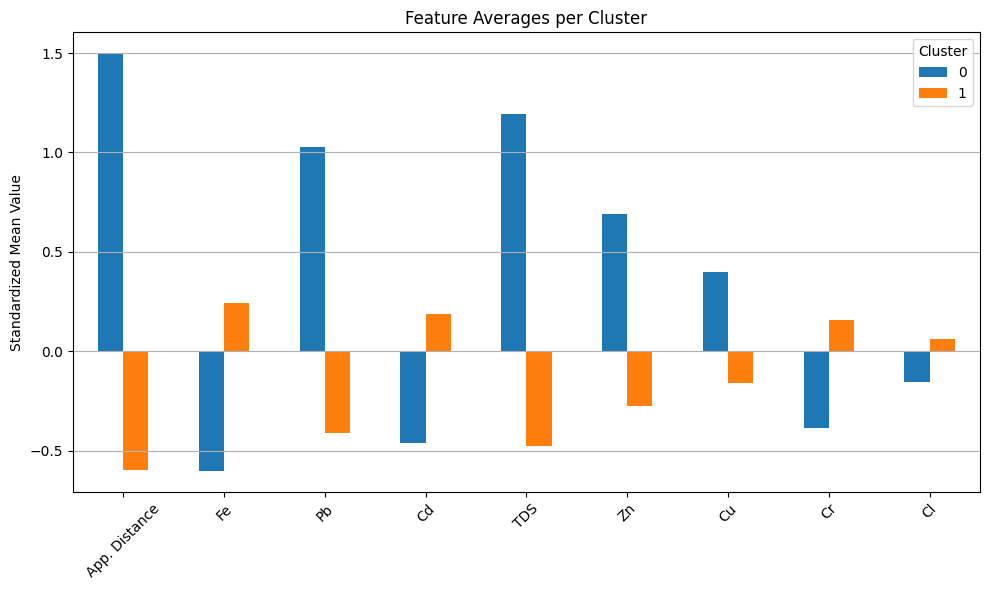

In [56]:
cluster_means_T.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Averages per Cluster")
plt.ylabel("Standardized Mean Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Cluster')
plt.show()

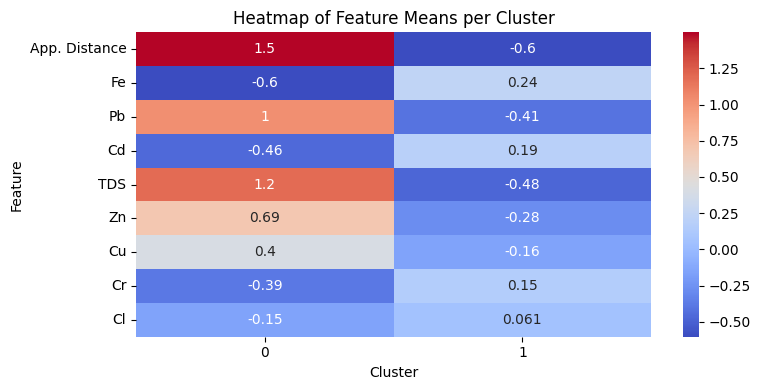

In [57]:
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_means_T, annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Means per Cluster")
plt.ylabel("Feature")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()